In [214]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,r2_score,silhouette_score,accuracy_score ,mean_absolute_error, mean_squared_error,classification_report ,precision_score, recall_score, f1_score
import pyttsx3
import pickle
plt.style.use ("dark_background")

In [179]:
Insurance = pd.read_csv("/content/drive/MyDrive/Google Colab/insurance.csv")
Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [180]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [181]:
Insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [182]:
Insurance.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [183]:
data_stats = Insurance.describe()
print("Statistical Summary for Numerical Columns:\n", data_stats)

Statistical Summary for Numerical Columns:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [184]:
categorical_stats = Insurance.describe(include=['object'])
print("\nStatistical Summary for Categorical Columns:\n", categorical_stats)


Statistical Summary for Categorical Columns:
          sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [185]:
#mean of ages in data
print(data_stats['age']['mean'])
#Range of Ages.
print([data_stats['age']['min'],data_stats['age']['max']])

39.20702541106129
[18.0, 64.0]


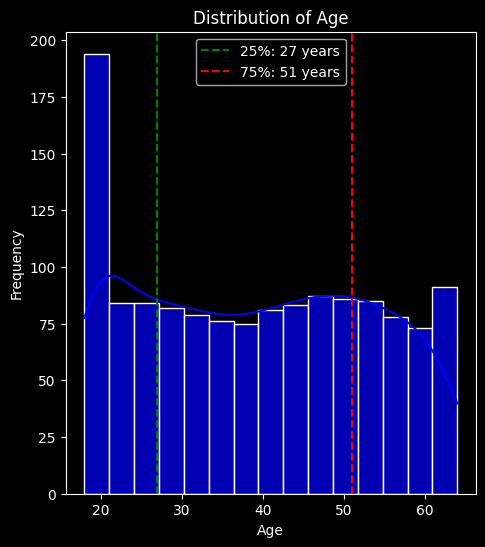

In [186]:
plt.figure(figsize=(18, 6))
# Age distribution chart
plt.subplot(1, 3, 1)
sns.histplot(Insurance['age'], bins=15, kde=True, color='blue', alpha=0.7)
plt.axvline(x=27, color='green', linestyle='--', label='25%: 27 years')
plt.axvline(x=51, color='red', linestyle='--', label='75%: 51 years')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [187]:
print(data_stats['bmi']['mean'])
print([data_stats['bmi']['min'],data_stats['bmi']['max']])

30.66339686098655
[15.96, 53.13]


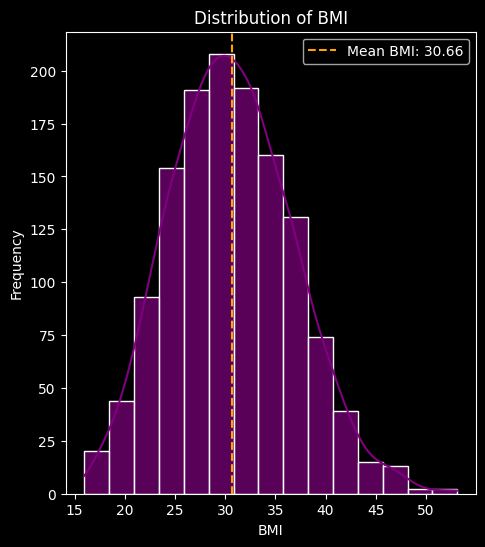

In [188]:
# الرسم البياني لتوزيع مؤشر كتلة الجسم (BMI)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
sns.histplot(Insurance['bmi'], bins=15, kde=True, color='purple', alpha=0.7)
plt.axvline(x=30.66, color='orange', linestyle='--', label='Mean BMI: 30.66')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()

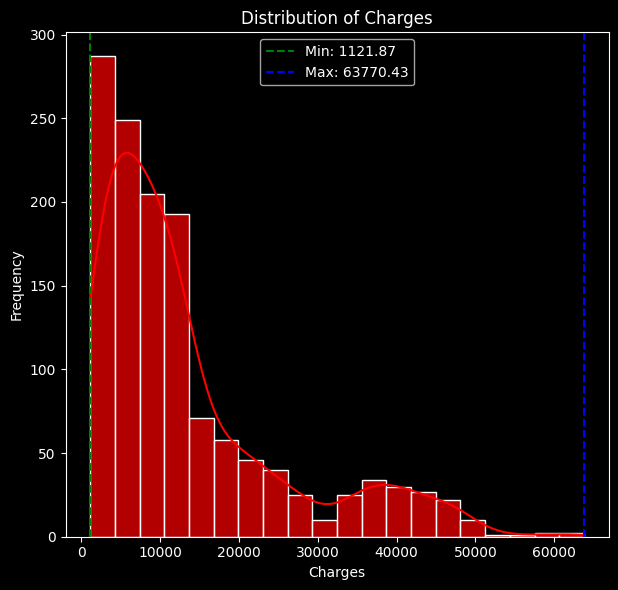

In [189]:
plt.figure(figsize=(18, 6))
# Chart of the distribution of medical costs (charges)
plt.subplot(1, 3, 3)
sns.histplot(Insurance['charges'], bins=20, kde=True, color='red', alpha=0.7)
plt.axvline(x=1121.87, color='green', linestyle='--', label='Min: 1121.87')
plt.axvline(x=63770.43, color='blue', linestyle='--', label='Max: 63770.43')
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.legend()

# تحسين المسافات بين الرسومات
plt.tight_layout()

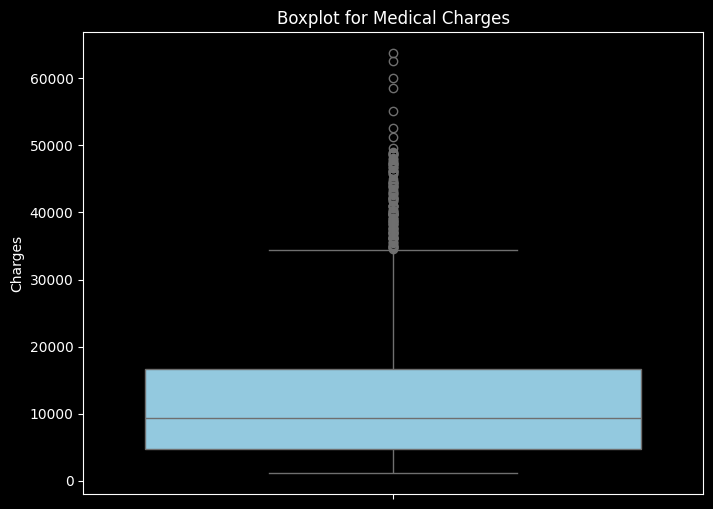

In [190]:
# رسم الصندوق الرسومي للعمود 'charges' لاكتشاف القيم المتطرفة
plt.figure(figsize=(8, 6))
sns.boxplot(y=Insurance['charges'], color='skyblue')
plt.title('Boxplot for Medical Charges')
plt.ylabel('Charges')
plt.show()

In [191]:
# حساب Q1 و Q3
Q1 = Insurance['charges'].quantile(0.25)
Q3 = Insurance['charges'].quantile(0.75)

# حساب IQR
IQR = Q3 - Q1

# حساب الحدود الدنيا والعليا
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# استخراج القيم المتطرفة
outliers = Insurance[(Insurance['charges'] < lower_bound) | (Insurance['charges'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", len(outliers))
print(outliers)


Lower Bound: -13109.1508975
Upper Bound: 34489.350562499996
Number of Outliers: 139
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [192]:
Insurance_no_outliers = Insurance[(Insurance['charges'] >= lower_bound) & (Insurance['charges'] <= upper_bound)]

# طباعة النتائج
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers Removed:", len(Insurance) - len(Insurance_no_outliers))
print("Data without Outliers:\n", Insurance_no_outliers)
Insurance = Insurance_no_outliers
Insurance

Lower Bound: -13109.1508975
Upper Bound: 34489.350562499996
Number of Outliers Removed: 139
Data without Outliers:
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1199 rows x 7 columns]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-193-e31c15999dc2>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-193-e31c15999dc2>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-193-e31c15999dc2>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 900x600 with 0 Axes>

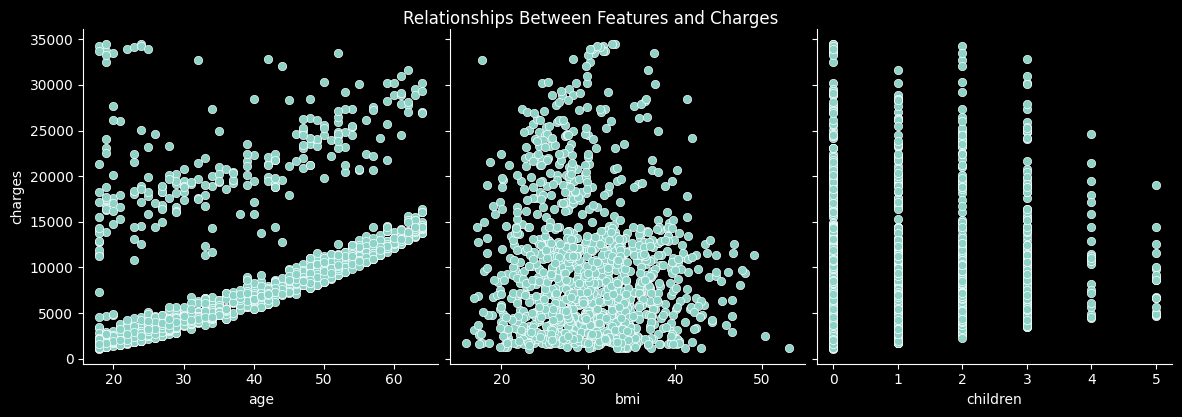

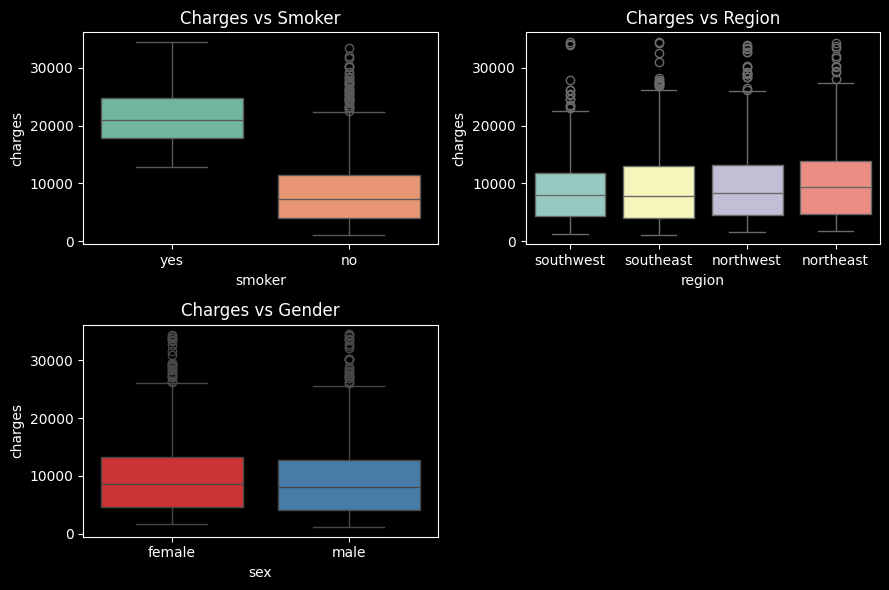

In [193]:
# Pairwise relationships with the target column (charges)
plt.figure(figsize=(9, 6))
sns.pairplot(Insurance, y_vars=['charges'], x_vars=['age', 'bmi', 'children'], height=4, aspect=1)
plt.suptitle("Relationships Between Features and Charges", y=1.02)

# Relationship with categorical variables (sex, smoker, region)
plt.figure(figsize=(9, 6))

# Charges vs Smoker
plt.subplot(2, 2, 1)
sns.boxplot(data=Insurance, x='smoker', y='charges', palette="Set2")
plt.title('Charges vs Smoker')

# Charges vs Region
plt.subplot(2, 2, 2)
sns.boxplot(data=Insurance, x='region', y='charges', palette="Set3")
plt.title('Charges vs Region')

# Charges vs Gender
plt.subplot(2, 2, 3)
sns.boxplot(data=Insurance, x='sex', y='charges', palette="Set1")
plt.title('Charges vs Gender')

plt.tight_layout()
plt.show()


In [194]:
avg_charges_by_region = Insurance.groupby('region')['charges'].mean().reset_index(name='Average charges')

# رسم الخريطة باستخدام locationmode='country names' لبلدان العالم
fig = px.choropleth(
    avg_charges_by_region,
    locations='region',
    locationmode='country names',
    color='Average charges',
    hover_name='region',
    color_continuous_scale='Viridis'
)

fig.update_geos(showcoastlines=True)

fig.update_layout(title_text='Average Insurance Charges by Region')

fig.show()


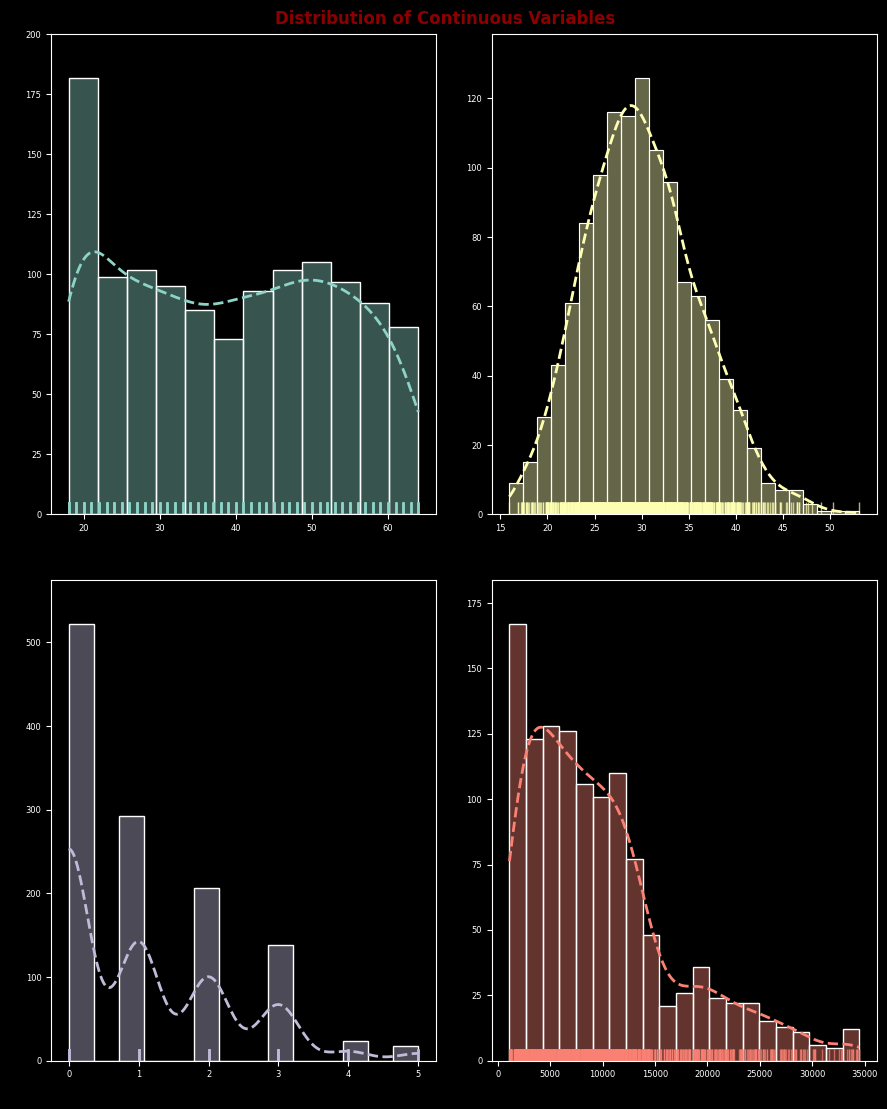

In [195]:
continuous_cols = Insurance.select_dtypes(exclude=['object'])
# Creating Subplots
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 12))
axes = axes.flat

color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(continuous_cols):
    sns.histplot(Insurance,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(Insurance,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)

fig.suptitle('Distribution of Continuous Variables', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

# **Encoding**

In [196]:
# One-hot encoding for categorical variables
Insurance = pd.get_dummies(Insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
Insurance


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [197]:
'''data_encoded = LabelEncoder()
Insurance['sex'] = data_encoded.fit_transform(Insurance['sex'])
Insurance['smoker'] = data_encoded.fit_transform(Insurance['smoker'])
Insurance['region'] = data_encoded.fit_transform(Insurance['region'])
Insurance'''

"data_encoded = LabelEncoder()\nInsurance['sex'] = data_encoded.fit_transform(Insurance['sex'])\nInsurance['smoker'] = data_encoded.fit_transform(Insurance['smoker'])\nInsurance['region'] = data_encoded.fit_transform(Insurance['region'])\nInsurance"

In [198]:
Insurance.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


In [199]:
Insurance.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.119505,0.040215,0.437642,-0.021252,-0.067391,-0.001355,-0.017384,0.015759
bmi,0.119505,1.000000,0.002736,-0.066495,0.027368,-0.255583,-0.119048,0.245156,0.004532
children,0.040215,0.002736,1.000000,0.083713,0.013131,-0.005651,0.013107,-0.018673,0.026425
charges,0.437642,-0.066495,0.083713,1.000000,-0.024358,0.602220,0.035171,-0.028649,-0.070884
sex_male,-0.021252,0.027368,0.013131,-0.024358,1.000000,0.012749,0.002604,0.002678,-0.005706
smoker_yes,-0.067391,-0.255583,-0.005651,0.602220,0.012749,1.000000,0.017377,-0.002003,-0.045675
region_northwest,-0.001355,-0.119048,0.013107,0.035171,0.002604,0.017377,1.000000,-0.342664,-0.330662
region_southeast,-0.017384,0.245156,-0.018673,-0.028649,0.002678,-0.002003,-0.342664,1.000000,-0.332116
region_southwest,0.015759,0.004532,0.026425,-0.070884,-0.005706,-0.045675,-0.330662,-0.332116,1.000000


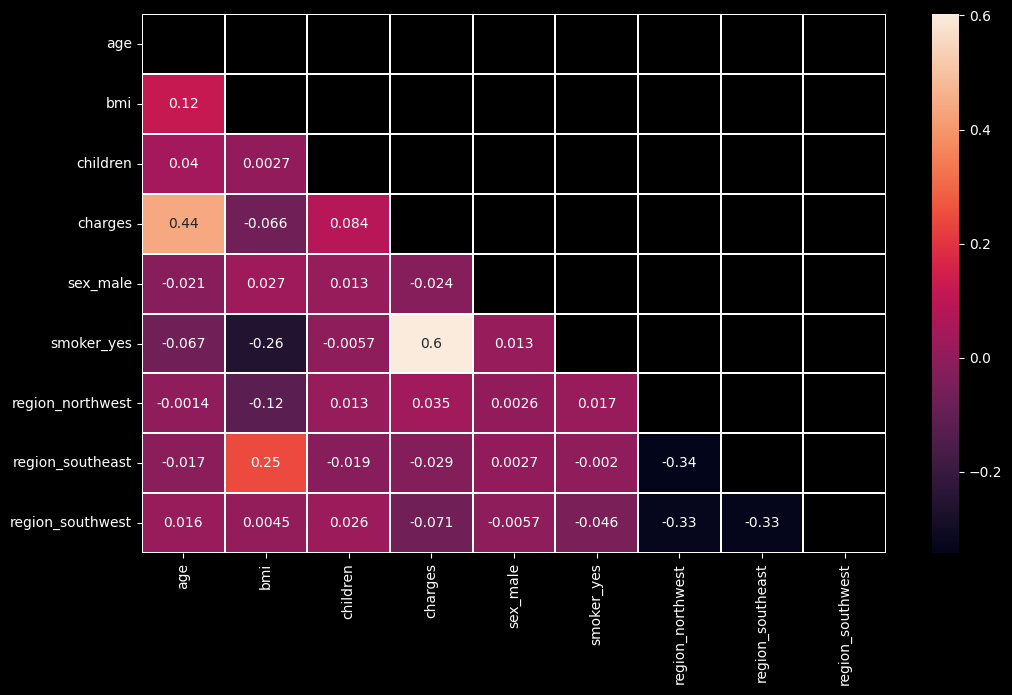

In [200]:
plt.figure(figsize=(12, 7))
matrix = np.triu(Insurance.corr())
sns.heatmap(Insurance.corr(), annot=True, linewidth=.10, mask=matrix);

# **Inputs and outputs split**

In [201]:
# Features and target
Input_Data_for_Insurance = Insurance.drop(columns='charges')
Output_Data_for_Insurance = Insurance['charges']

In [202]:
# Train-test split
Input_Data_for_Insurance_training, Input_Data_for_Insurance_testing, Output_Data_for_Insurance_training, Output_Data_for_Insurance_testing = train_test_split(Input_Data_for_Insurance, Output_Data_for_Insurance, test_size=0.2, random_state=42)

# **Linear Regression model**

In [203]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(Input_Data_for_Insurance_training, Output_Data_for_Insurance_training)
# Predictions
Model_pred = lr_model.predict(Input_Data_for_Insurance_testing)
pd.DataFrame(Model_pred).sample(n=1)

,0
118,7392.112731


In [204]:
# Evaluation metrics
r2 = r2_score(Output_Data_for_Insurance_testing, Model_pred)
mae = mean_absolute_error(Output_Data_for_Insurance_testing, Model_pred)
mse = mean_squared_error(Output_Data_for_Insurance_testing, Model_pred)

# Print results
print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

R²: 0.5568176371144349
MAE: 2796.369560957072
MSE: 27645846.66499935
RMSE: 5257.931785883053


In [207]:
# Set a threshold for classifying predictions as high or low
threshold = 15000  # Example threshold for high charges
# Convert continuous predictions to binary classifications
Model_pred_binary = (Model_pred > threshold).astype(int)
Output_Data_for_Insurance_testing_binary = (Output_Data_for_Insurance_testing > threshold).astype(int)
# 1. حساب Precision
precision = precision_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 2. حساب Recall
recall = recall_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 3. حساب F1-Score
f1 = f1_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 4. حساب Delta Base Precision
# Base Precision : the precision if all prediction is 1
base_precision = sum(Output_Data_for_Insurance_testing_binary) / len(Output_Data_for_Insurance_testing_binary)
delta_base_precision = precision - base_precision
accuracy = accuracy_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# طباعة النتائج
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Delta Base Precision:", delta_base_precision)
print("Accuracy:", accuracy)

Precision: 0.972972972972973
Recall: 0.6206896551724138
F1-Score: 0.7578947368421053
Delta Base Precision: 0.7313063063063063
Accuracy: 0.9041666666666667


# **RandomForestRegressor**

In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# تدريب نموذج Random Forest
Random_Forest_Model = RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest_Model.fit(Input_Data_for_Insurance_training, Output_Data_for_Insurance_training)
# التنبؤ بالتكاليف العلاجية
Random_Forest_pred = Random_Forest_Model.predict(Input_Data_for_Insurance_testing)
# حساب معايير التقييم
rf_r2 = r2_score(Output_Data_for_Insurance_testing, Random_Forest_pred)
rf_mae = mean_absolute_error(Output_Data_for_Insurance_testing, Random_Forest_pred)
rf_mse = mean_squared_error(Output_Data_for_Insurance_testing, Random_Forest_pred)
rf_rmse = np.sqrt(rf_mse)
# طباعة نتائج Random Forest
print("Random Forest R²:", rf_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)

Random Forest R²: 0.5536409938212284
Random Forest MAE: 2686.3364313878124
Random Forest MSE: 27844006.611666854
Random Forest RMSE: 5276.74204520809


In [210]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# افتراض أن لديك التنبؤات (Model_pred) والبيانات الحقيقية (Output_Data_for_Insurance_testing)
# حيث أن العتبة هي 15000 لتصنيف التكاليف العالية والمنخفضة
threshold = 15000  # مثال على العتبة لتصنيف التكاليف العلاجية
# تحويل التنبؤات المستمرة إلى تصنيفات ثنائية (0 أو 1) بناءً على العتبة
Model_pred_binary = (Random_Forest_pred > threshold).astype(int)
Output_Data_for_Insurance_testing_binary = (Output_Data_for_Insurance_testing > threshold).astype(int)
# 1. حساب Precision
precision = precision_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 2. حساب Recall
recall = recall_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 3. حساب F1-Score
f1 = f1_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 4. حساب Delta Base Precision
# Base Precision: الدقة إذا كانت جميع التنبؤات = 1
base_precision = sum(Output_Data_for_Insurance_testing_binary) / len(Output_Data_for_Insurance_testing_binary)
delta_base_precision = precision - base_precision
# 5. حساب Accuracy (الدقة)
accuracy = accuracy_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# طباعة النتائج
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Delta Base Precision:", delta_base_precision)
print("Accuracy:", accuracy)

Precision: 0.8085106382978723
Recall: 0.6551724137931034
F1-Score: 0.7238095238095238
Delta Base Precision: 0.5668439716312056
Accuracy: 0.8791666666666667


# **GradientBoostingRegressor**

In [211]:
# تدريب نموذج Gradient Boosting
Gradient_Boosting_Model = GradientBoostingRegressor(n_estimators=100, random_state=42)
Gradient_Boosting_Model.fit(Input_Data_for_Insurance_training, Output_Data_for_Insurance_training)
# التنبؤ بالتكاليف العلاجية
Gradient_Boosting_Pred = Gradient_Boosting_Model.predict(Input_Data_for_Insurance_testing)
# حساب معايير التقييم
gb_r2 = r2_score(Output_Data_for_Insurance_testing, Gradient_Boosting_Pred)
gb_mae = mean_absolute_error(Output_Data_for_Insurance_testing, Gradient_Boosting_Pred)
gb_mse = mean_squared_error(Output_Data_for_Insurance_testing, Gradient_Boosting_Pred)
gb_rmse = np.sqrt(gb_mse)
# طباعة نتائج Gradient Boosting
print("Gradient Boosting R²:", gb_r2)
print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting RMSE:", gb_rmse)

Gradient Boosting R²: 0.5857499300333557
Gradient Boosting MAE: 2535.198907980266
Gradient Boosting MSE: 25841041.689242974
Gradient Boosting RMSE: 5083.4084716106545


In [212]:
# افتراض أن لديك التنبؤات (Model_pred) والبيانات الحقيقية (Output_Data_for_Insurance_testing)
# حيث أن العتبة هي 15000 لتصنيف التكاليف العالية والمنخفضة
threshold = 15000  # مثال على العتبة لتصنيف التكاليف العلاجية
# تحويل التنبؤات المستمرة إلى تصنيفات ثنائية (0 أو 1) بناءً على العتبة
Model_pred_binary = (Gradient_Boosting_Pred > threshold).astype(int)
Output_Data_for_Insurance_testing_binary = (Output_Data_for_Insurance_testing > threshold).astype(int)
# 1. حساب Precision
precision = precision_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 2. حساب Recall
recall = recall_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 3. حساب F1-Score
f1 = f1_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 4. حساب Delta Base Precision
# Base Precision: الدقة إذا كانت جميع التنبؤات = 1
base_precision = sum(Output_Data_for_Insurance_testing_binary) / len(Output_Data_for_Insurance_testing_binary)
delta_base_precision = precision - base_precision
# 5. حساب Accuracy (الدقة)
accuracy = accuracy_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# طباعة النتائج
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Delta Base Precision:", delta_base_precision)
print("Accuracy:", accuracy)

Precision: 0.9024390243902439
Recall: 0.6379310344827587
F1-Score: 0.7474747474747475
Delta Base Precision: 0.6607723577235772
Accuracy: 0.8958333333333334


# **Neural Network**

In [219]:
# تحويل البيانات إلى النطاق المطلوب
scaler = StandardScaler()
Input_train_scaled = scaler.fit_transform(Input_Data_for_Insurance_training)  # تدريب المقاييس
Input_test_scaled = scaler.transform(Input_Data_for_Insurance_testing)  # تحويل بيانات الاختبار

# بناء نموذج الشبكة العصبية
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=Input_Data_for_Insurance_training.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # طبقة الإخراج مع وحدة واحدة (تنبؤ بالقيمة المستمرة)

# تجميع النموذج
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# تدريب النموذج
nn_model.fit(Input_train_scaled, Output_Data_for_Insurance_training, epochs=50, batch_size=32, verbose=1)

# التنبؤ بالتكاليف العلاجية
nn_pred = nn_model.predict(Input_test_scaled)

# حساب معايير التقييم
nn_r2 = r2_score(Output_Data_for_Insurance_testing, nn_pred)
nn_mae = mean_absolute_error(Output_Data_for_Insurance_testing, nn_pred)
nn_mse = mean_squared_error(Output_Data_for_Insurance_testing, nn_pred)
nn_rmse = np.sqrt(nn_mse)

# طباعة نتائج Neural Network
print("Neural Network R²:", nn_r2)
print("Neural Network MAE:", nn_mae)
print("Neural Network MSE:", nn_mse)
print("Neural Network RMSE:", nn_rmse)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 146858944.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137911840.0000
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 150585008.0000
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142375504.0000
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140514256.0000
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143667536.0000
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133123064.0000
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149177552.0000
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130050440.0000
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132897768.0000
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132265288.0000
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128830472.0000
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133097296.0000
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [220]:
# افتراض أن لديك التنبؤات (Model_pred) والبيانات الحقيقية (Output_Data_for_Insurance_testing)
# حيث أن العتبة هي 15000 لتصنيف التكاليف العالية والمنخفضة
threshold = 15000  # مثال على العتبة لتصنيف التكاليف العلاجية
# تحويل التنبؤات المستمرة إلى تصنيفات ثنائية (0 أو 1) بناءً على العتبة
Model_pred_binary = (nn_pred > threshold).astype(int)
Output_Data_for_Insurance_testing_binary = (Output_Data_for_Insurance_testing > threshold).astype(int)
# 1. حساب Precision
precision = precision_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 2. حساب Recall
recall = recall_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 3. حساب F1-Score
f1 = f1_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# 4. حساب Delta Base Precision
# Base Precision: الدقة إذا كانت جميع التنبؤات = 1
base_precision = sum(Output_Data_for_Insurance_testing_binary) / len(Output_Data_for_Insurance_testing_binary)
delta_base_precision = precision - base_precision
# 5. حساب Accuracy (الدقة)
accuracy = accuracy_score(Output_Data_for_Insurance_testing_binary, Model_pred_binary)
# طباعة النتائج
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Delta Base Precision:", delta_base_precision)
print("Accuracy:", accuracy)

Precision: 0.918918918918919
Recall: 0.5862068965517241
F1-Score: 0.7157894736842105
Delta Base Precision: 0.6772522522522523
Accuracy: 0.8875


# **Delployment**

In [232]:

pickled_model = pickle.load(open('Medical Cost.pkl', 'rb'))
random_row = Insurance.sample(n=1)
# Get the feature columns used during training
# Assuming 'charges' was the target variable and not a feature
feature_columns = pickled_model.feature_names_in_
# Select only the relevant features from the random row
random_row_features = random_row[feature_columns]
# Make the prediction
prediction = pickled_model.predict(random_row_features)
# Print the prediction
prediction = int(prediction)
print(prediction)

26535


<ipython-input-232-d33ba97537f6>:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [233]:
if prediction >= threshold:
    print("The insurance cost is expensive.")
else:
    print("The insurance cost is cheap.")

The insurance cost is expensive.
